## 模型驗證

In [18]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
predicted = clf.predict(iris.data)

In [20]:
import numpy 
na = numpy.array([True,False,True])
sum(na)

2

In [21]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.96

In [23]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
m= confusion_matrix(iris.target, predicted)
m

[0 1 2]


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


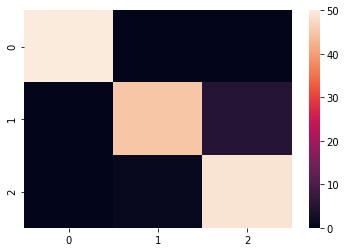

In [24]:
%pylab inline

import seaborn
seaborn.heatmap(m)

In [26]:
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target

In [62]:
import random
random.seed(123)
random.randint(1,100)
print(random.sample(range(42),k=6))
print(random.sample(range(42),k=6))
print(random.sample(range(42),k=6))

[17, 5, 26, 41, 6, 2]
[24, 34, 35, 21, 38, 3]
[10, 8, 21, 35, 39, 15]


In [63]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size =0.33, random_state = 123)

In [65]:
train_X.shape

(100, 4)

In [66]:
test_X.shape

(50, 4)

In [68]:
train_y.shape

(100,)

In [69]:
test_y.shape

(50,)

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
predicted = clf.predict(test_X)

In [73]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(test_X)
accuracy_score(test_y, predicted)

0.96

In [74]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(test_y, predicted)
m

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]], dtype=int64)

In [79]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

acc = []
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train], X[test], y[train], y[test]
    
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    
    predicted = clf.predict(test_X)
    
    acc.append(accuracy_score(test_y, predicted))


In [81]:
sum(acc) / len(acc)

0.96

In [83]:
np_acc = np.array(acc)
np_acc.mean()

0.96

In [85]:
np_acc.var()

0.0028444444444444433

In [86]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X=iris.data, y=iris.target, cv= 10)


In [88]:
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [89]:
acc.mean()

0.96

In [90]:
acc.std()

0.044221663871405324

In [92]:
from sklearn.model_selection import LeaveOneOut
res = []
loo = LeaveOneOut()
for train, test in loo.split(X):
    train_X, test_X, train_y, test_y = X[train],X[test], y[train],y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    res.extend((predicted == test_y).tolist())
sum(res) /  len(res)

0.96

In [94]:
import inspect
lines = inspect.getsource(LeaveOneOut)
print(lines)

class LeaveOneOut(BaseCrossValidator):
    """Leave-One-Out cross-validator

    Provides train/test indices to split data in train/test sets. Each
    sample is used once as a test set (singleton) while the remaining
    samples form the training set.

    Note: ``LeaveOneOut()`` is equivalent to ``KFold(n_splits=n)`` and
    ``LeavePOut(p=1)`` where ``n`` is the number of samples.

    Due to the high number of test sets (which is the same as the
    number of samples) this cross-validation method can be very costly.
    For large datasets one should favor :class:`KFold`, :class:`ShuffleSplit`
    or :class:`StratifiedKFold`.

    Read more in the :ref:`User Guide <cross_validation>`.

    Examples
    --------
    >>> from sklearn.model_selection import LeaveOneOut
    >>> X = np.array([[1, 2], [3, 4]])
    >>> y = np.array([1, 2])
    >>> loo = LeaveOneOut()
    >>> loo.get_n_splits(X)
    2
    >>> print(loo)
    LeaveOneOut()
    >>> for train_index, test_index in loo.split(X):
 

## 建立 ROC 曲線

In [104]:
from sklearn.tree import DecisionTreeClassifier
X = iris.data
y = iris.target
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [105]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
#clf.predict_proba(X)


| TP |  FP
|--------|--------|
| FN |  TN

|      | 非流失  | 流失   |
|------|--------|--------|
| 預測非流失 |10000 | 2000 |
|  預測流失  |1000  | 1000 |


- 流失留客成本: 2000$
- (1000 + 1000) * 2000

---------------------------------

- 流失客戶價值: 12000
- (2000 + 1000 ) * 12000

In [108]:
(1000 + 1000) * 2000 + (2000 + 1000 ) * 12000

40000000


|      | 非流失  | 流失   |
|------|--------|--------|
| 預測非流失 |10000 | 1000 |
|  預測流失  |2000  | 1000 |

- 流失留客成本: 2000$
- (2000 + 1000) * 2000

--------------------------------

- 流失客戶價值: 12000
- (1000 + 1000 ) * 12000

In [110]:
(2000 + 1000) * 2000 + (1000 + 1000 ) * 12000

30000000

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X = iris.data[50:150,:]

le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [159]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [161]:
# probability to predict virginica 
proba = clf.predict_proba(X)[:,1] > 0.3
proba

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [162]:
proba == y

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [163]:
confusion_matrix(y, proba)

array([[41,  9],
       [ 0, 50]], dtype=int64)

In [164]:
TP = 41
FP = 9
FN = 0
TN = 50

In [165]:
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)
FPR, TPR

(0.15254237288135594, 1.0)

In [166]:
import pandas
TPR_ary = [0]
FPR_ary = [0]

for threshold in np.arange(0,1,0.1):
    proba = clf.predict_proba(X)[:,1] > threshold
    m     = confusion_matrix(y, proba)
    TP = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TN = m[1,1]
    
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    if pandas.notnull(FPR) and pandas.notnull(TPR):
        print(threshold, TPR, FPR)
        TPR_ary.append(TPR)
        FPR_ary.append(FPR)
        
TPR_ary.append(1)
FPR_ary.append(1)


0.1 1.0 0.40476190476190477
0.2 1.0 0.2753623188405797
0.30000000000000004 1.0 0.15254237288135594
0.4 1.0 0.09090909090909091
0.5 1.0 0.05660377358490566
0.6000000000000001 0.9074074074074074 0.021739130434782608
0.7000000000000001 0.8448275862068966 0.023809523809523808
0.8 0.7575757575757576 0.0
0.9 0.5952380952380952 0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [175]:
fpr_ary = np.array(FPR_ary)
tpr_ary = np.array(TPR_ary)

In [174]:
fpr_ary.argsort()

array([ 0,  8,  9,  6,  7,  5,  4,  3,  2,  1, 10], dtype=int64)

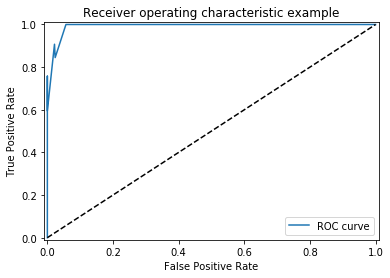

In [177]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary[fpr_ary.argsort()], tpr_ary[fpr_ary.argsort()],label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [178]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris = load_iris()
X = iris.data[50:150,]
le = preprocessing.LabelEncoder()
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [179]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
clf.fit(train_X,train_y)
probas_ = clf.predict_proba(test_X)
#probas_[:, 1]

In [181]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_y, probas_[:,1])


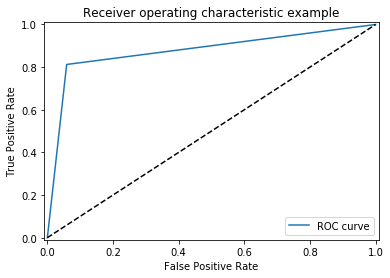

In [184]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [185]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.876838


In [186]:
clf2 = LogisticRegression()
clf2.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [187]:
clf2.fit(train_X,train_y)
probas2_ = clf2.predict_proba(test_X)

In [188]:
fpr2, tpr2, thresholds2 = roc_curve(test_y, probas2_[:,1])

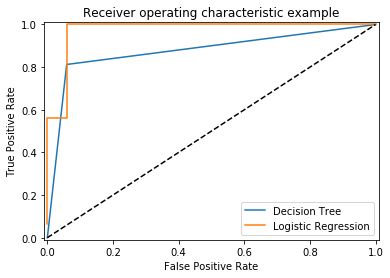

In [190]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='Decision Tree')
plt.plot(fpr2, tpr2,label='Logistic Regression')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [191]:
from sklearn.metrics import auc
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.974265


## 比較不同模型

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

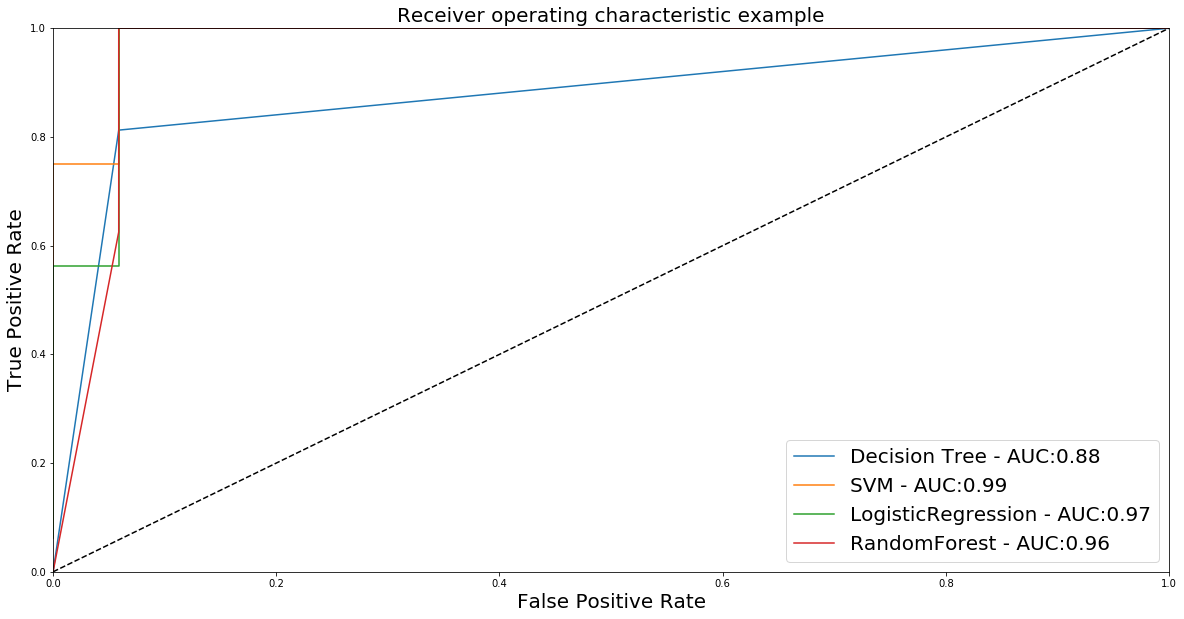

In [195]:
plt.figure(figsize= [20,10])

for clf, title in zip([clf1,clf2,clf3, clf4], \
            ['Decision Tree', 'SVM', 'LogisticRegression','RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)

plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


In [197]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [200]:
le.transform([6,2,6,1])

array([2, 1, 2, 0], dtype=int64)

In [210]:
from sklearn import preprocessing
cat_features = ['color', 'director_name', 'actor_2_name']
enc = preprocessing.LabelEncoder()
enc.fit(cat_features)

new_cat_features = enc.transform(cat_features)

print(new_cat_features)


[1 2 0]


In [212]:
new_cat_features = new_cat_features.reshape(-1, 1) 
new_cat_features

array([[1],
       [2],
       [0]], dtype=int64)

In [214]:
ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
print(ohe.fit_transform(new_cat_features))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [215]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F',23], ['tom', 'M', 35], ['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [216]:
df.columns =['name', 'gender', 'age']

In [219]:
pandas.get_dummies(df['gender'])

,F,M
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0


In [220]:
df['gender']

0    M
1    F
2    M
3    M
4    F
5    F
Name: gender, dtype: object

In [222]:
enc = preprocessing.LabelEncoder()
enc.fit(df['gender'].values)

new_features = enc.transform(df['gender'].values)
new_features

array([1, 0, 1, 1, 0, 0], dtype=int64)

In [224]:
new_features = new_features.reshape(-1, 1) 

In [225]:
ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
ohe.fit_transform(new_features)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

## 客戶流失分析

### 讀取資料

In [228]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col=0)

### 資料預處理

In [230]:
del customers['state']
del customers['account_length']
del customers['area_code']

In [234]:
customers['international_plan'] = customers['international_plan'].map(lambda e: 1 if e == 'yes' else 0)

In [236]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(customers['voice_mail_plan'])

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [237]:
customers['voice_mail_plan'] = customers['voice_mail_plan'].map(lambda e: 1 if e == 'yes' else 0)

In [239]:
customers['churn'] = customers['churn'].map(lambda e: 1 if e == 'yes' else 0)

In [241]:
X = customers.iloc[:,0:-1]

In [243]:
y = customers.loc[:,'churn']

### 將資料分為訓練與測試資料集

In [245]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [246]:
train_X.shape

(2233, 16)

In [247]:
test_X.shape

(1100, 16)

In [248]:
train_y.shape

(2233,)

In [250]:
test_y.shape

(1100,)

### 建立模型

In [251]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [252]:
predicted = clf1.predict(test_X)

### 評估模型

In [256]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(test_y, predicted)

0.9190909090909091

In [255]:
confusion_matrix(test_y, predicted)

array([[891,  49],
       [ 40, 120]], dtype=int64)

In [258]:
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

          0       0.96      0.95      0.95       940
          1       0.71      0.75      0.73       160

avg / total       0.92      0.92      0.92      1100



In [259]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf1, X=test_X, y=test_y, cv= 10)

In [260]:
acc

array([0.9       , 0.9       , 0.92727273, 0.91818182, 0.91818182,
       0.89090909, 0.83636364, 0.91818182, 0.96363636, 0.92727273])

In [261]:
acc.mean()

0.9099999999999999

In [262]:
acc.std()

0.031082401813234118

### 比較不同模型

In [263]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

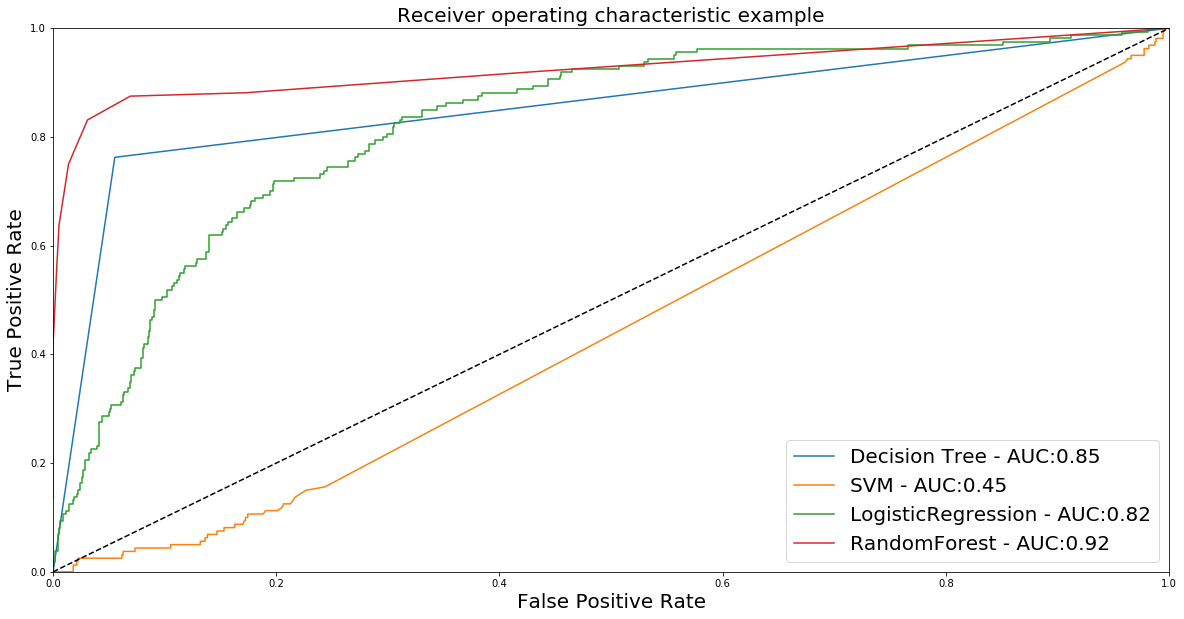

In [264]:
plt.figure(figsize= [20,10])

for clf, title in zip([clf1,clf2,clf3, clf4], \
            ['Decision Tree', 'SVM', 'LogisticRegression','RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)

plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()


### Tensorflow + Keras

In [265]:
! pip install tensorflow

  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\3c\33\ae\db8cd618e62f87594c13a5483f96e618044f9b01596efd013f
  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\9a\1f\0e\3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
Successfully built termcolor absl-py gast


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [266]:
! pip install keras

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 將資料標準化

In [268]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test  = sc.fit_transform(test_X)

### 建立深度學習模型

In [269]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [270]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [271]:
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = classifier.fit(X_train, train_y,
                    batch_size=10,
                    epochs=100,
                    validation_data=(X_test, test_y))

In [274]:
y_pred = classifier.predict(X_test)

### 比較不同模型

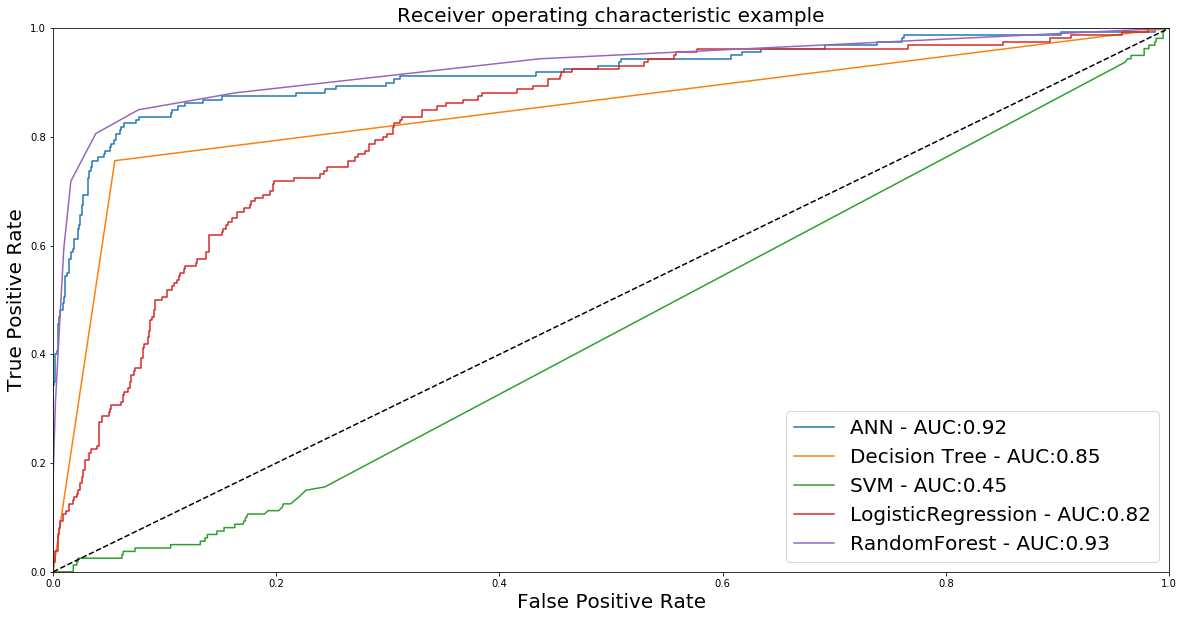

In [276]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(test_y, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

### 找出重要特徵

In [278]:
train_X.columns

Index(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [277]:
clf4.feature_importances_

array([0.06789511, 0.01020201, 0.03879224, 0.12129935, 0.03422858,
       0.15908417, 0.06838633, 0.03380491, 0.06877447, 0.04284291,
       0.04476411, 0.04481302, 0.03149938, 0.05510606, 0.05149863,
       0.12700871])

In [280]:
idx = clf4.feature_importances_.argsort()

array([ 1, 12,  7,  4,  2,  9, 10, 11, 14, 13,  0,  6,  8,  3, 15,  5],
      dtype=int64)

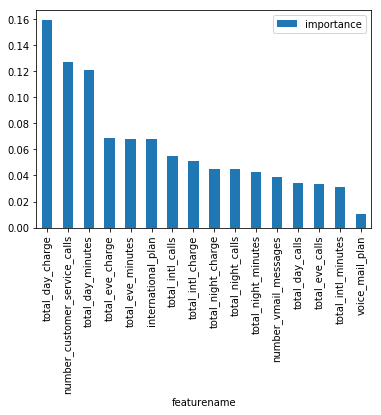

In [289]:
import pandas
fi = pandas.concat([pandas.Series(train_X.columns), pandas.Series(clf4.feature_importances_)],axis = 1)
fi.columns = ['featurename', 'importance']
fi.sort_values('importance', ascending = False).plot(kind = 'bar', x = 'featurename')

### 補充- 特徵篩選
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV

In [295]:
a = pandas.Series(['yes', 'no', 'yes'])
#a[a=='yes'] = 1
#a[a=='no'] = 0

In [299]:
a = pandas.Series(['yes', 'no', 'yes' , 'unknown', 'yes'])
pandas.get_dummies(a).iloc[:,1:]

,unknown,yes
0,0,1
1,0,0
2,0,1
3,1,0
4,0,1


In [301]:
import pandas
c2 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col=0)

In [307]:
d2 = pandas.get_dummies(c2['international_plan']).iloc[:,1]

## 分群問題

In [311]:
a = np.array([3,5])
b = np.array([1,7])
np.sqrt(sum((a - b) ** 2))

2.8284271247461903

In [312]:
from sklearn.datasets import load_iris
iris = load_iris()

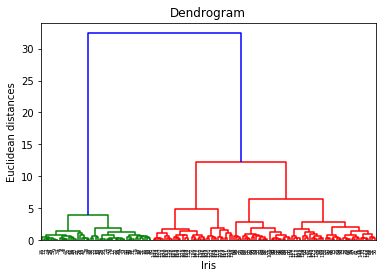

In [313]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(iris.data, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

In [314]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(iris.data)


In [315]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

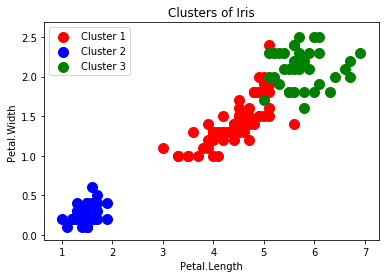

In [318]:
plt.scatter(iris.data[y_hc == 0, 2], iris.data[y_hc == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_hc == 1, 2], iris.data[y_hc == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_hc == 2, 2], iris.data[y_hc == 2, 3], s = 100, c = 'green', label = 'Cluster 3')


plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


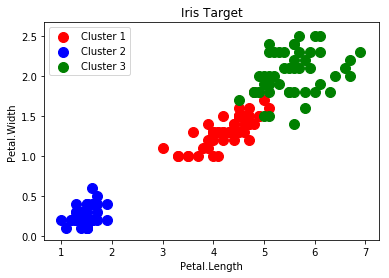

In [320]:
plt.scatter(iris.data[iris.target == 1, 2], iris.data[iris.target  == 1, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[iris.target  == 0, 2], iris.data[iris.target  == 0, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[iris.target  == 2, 2], iris.data[iris.target  == 2, 3], s = 100, c = 'green', label = 'Cluster 3')


plt.title('Iris Target')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [322]:
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(iris.data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [336]:
?KMeans

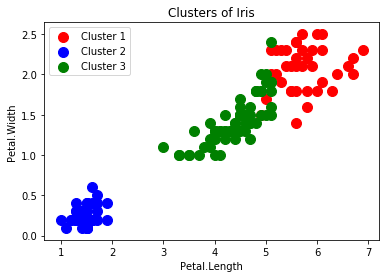

In [323]:
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')


plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [325]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

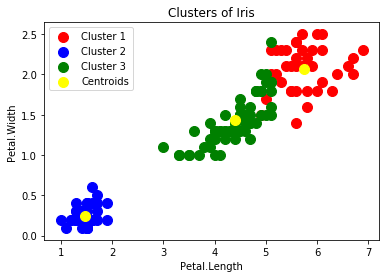

In [327]:

plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c =
'yellow', label = 'Centroids')

plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()


In [337]:
np.sqrt(sum((iris.data[0] - iris.data[1])  ** 2))

0.5385164807134502

## 客戶資料分群 

In [338]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')

In [348]:
X = customers.iloc[:,[3,4]].values

In [342]:
?KMeans

In [349]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

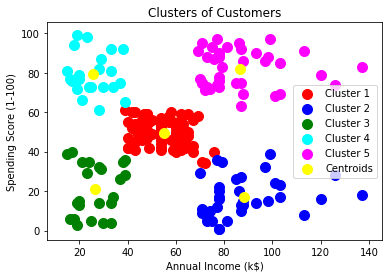

In [354]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c ='yellow', label = 'Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [356]:
kmeans.inertia_

44448.45544793371

In [357]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
    random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

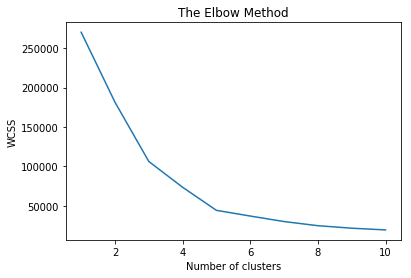

In [358]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [359]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f" %
metrics.silhouette_score(X, y_kmeans))

Silhouette Coefficient: 0.554


In [362]:
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    sil.append(metrics.silhouette_score(X, y_kmeans))


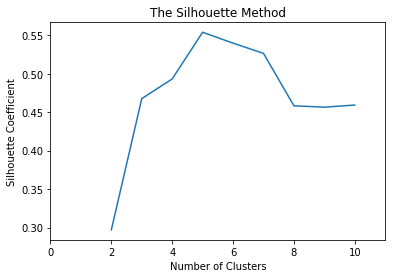

In [363]:
plt.plot(range(2, 11), sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


In [364]:
# ward
ward   = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)

#complete
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = complete.fit_predict(X)

# kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [365]:
for est, title in zip([y_ward,y_complete, y_kmeans], ['ward', 'complete','kmeans']):
    print(title, metrics.silhouette_score(X, est))

ward 0.5529945955148897
complete 0.5529945955148897
kmeans 0.553931997444648


## DBSCAN

In [368]:
from PIL import Image
img = Image.open('handwriting.png')
img

In [369]:
img2 = img.rotate(-90).convert("L")
img2

In [370]:
imgarr = np.array(img2)

In [377]:
from sklearn.preprocessing import binarize
#binarize(imgarr, 0)

In [378]:
imagedata = np.where(binarize(imgarr, 0) == 0)

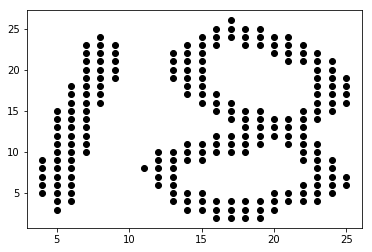

In [381]:
plt.scatter(imagedata[0], imagedata[1], color= 'k')

In [387]:
X =np.column_stack([imagedata[0],imagedata[1]])
#X

In [388]:
# kmeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

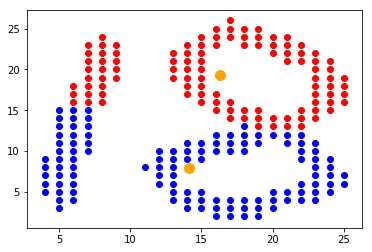

In [394]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], color= 'red')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], color= 'blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color= 'orange', s = 100)

In [395]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=3)

In [396]:
y_dbs = dbs.fit_predict(X)

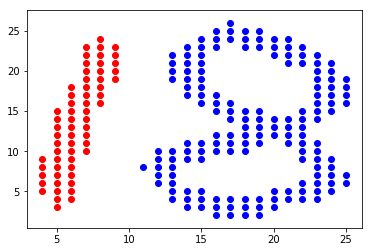

In [397]:
plt.scatter(X[y_dbs==0,0], X[y_dbs==0,1], color= 'red')
plt.scatter(X[y_dbs==1,0], X[y_dbs==1,1], color= 'blue')

## 房屋資料分群

In [406]:
import requests
from bs4 import BeautifulSoup
headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36' 
}
res = requests.get('https://sale.591.com.tw/home/house/detail/2/5448818.html', headers = headers)
soup = BeautifulSoup(res.text, 'lxml')
lon, lat = soup.select_one('.detail-map-box iframe').get('src').split('q=')[1].split('&')[0].split(',')

In [407]:
lon, lat

('25.0431252', '121.5432053')

In [410]:
import pandas
house = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv', index_col=0)

In [412]:
house = house[['address', 'latitude', 'longitude']]

In [415]:
taipei = house[house['address'].str.contains('台北市')]

In [428]:
taipei[['city','area']] = taipei['address'].str.extract('(台北市)(.*?區)')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [429]:
taipei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17168 entries, 11 to 70314
Data columns (total 5 columns):
address      17168 non-null object
latitude     17168 non-null float64
longitude    17168 non-null float64
city         17168 non-null object
area         17168 non-null object
dtypes: float64(2), object(3)
memory usage: 804.8+ KB


In [455]:
taipei = taipei[taipei['longitude'] > 30]

In [456]:
X = taipei.loc[:,['longitude','latitude']]

In [465]:
area = taipei['area']

In [466]:
area.value_counts()

中山區    3440
大安區    2806
信義區    1864
內湖區    1603
松山區    1411
士林區    1372
中正區    1284
北投區     835
大同區     795
文山區     613
萬華區     603
南港區     540
Name: area, dtype: int64

In [468]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(taipei['area'].values)

In [469]:
y

array([ 9,  4, 10, ...,  4,  3,  7], dtype=int64)

In [459]:
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters = 12, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)

In [460]:
y_kmeans.max(),y_kmeans.min() 

(11, 0)

In [461]:
import matplotlib

cmap = matplotlib.cm.get_cmap('tab20')

rgba = cmap(4)
rgba

(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)

In [462]:
X.values

array([[121.574008 ,  24.9886979],
       [121.5081385,  25.1409925],
       [121.5538302,  25.0518682],
       ...,
       [121.5228707,  25.1185346],
       [121.5829663,  25.0685515],
       [121.516793 ,  25.055486 ]])

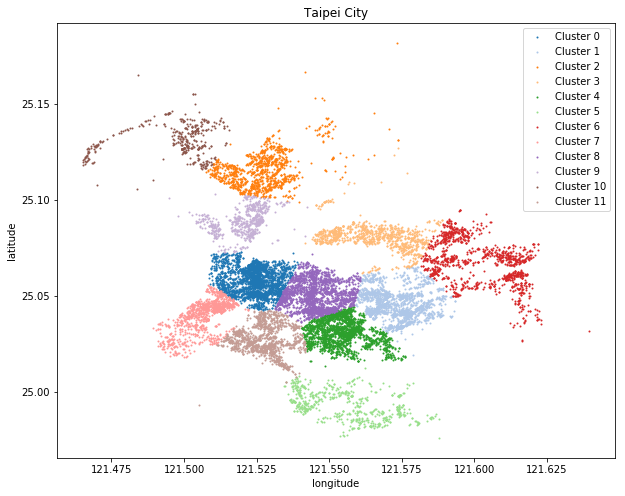

In [472]:
plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1], s = 1, c = cmap(i), label = 'Cluster {}'.format(i))

plt.title('Taipei City')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()


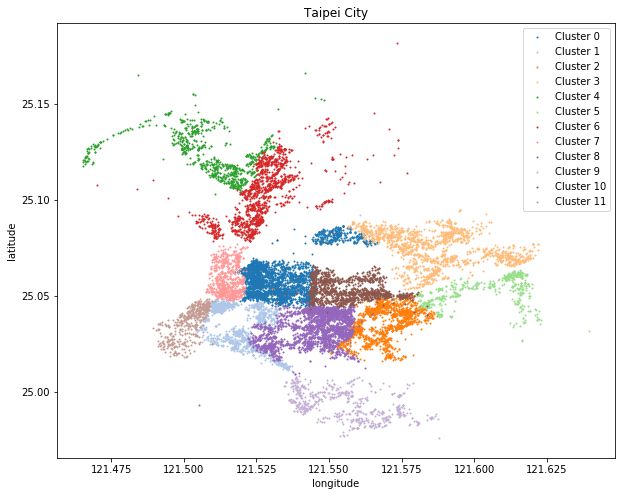

In [471]:
plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.scatter(X.values[y == i, 0], X.values[y == i, 1], s = 1, c = cmap(i), label = 'Cluster {}'.format(i))

plt.title('Taipei City')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()


In [545]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.0009, min_samples=6)

In [546]:
y_dbs = dbs.fit_predict(X)

In [547]:
y_dbs.max()

225

In [548]:
y_dbs

array([ 0,  1,  2, ...,  8, 22,  2], dtype=int64)

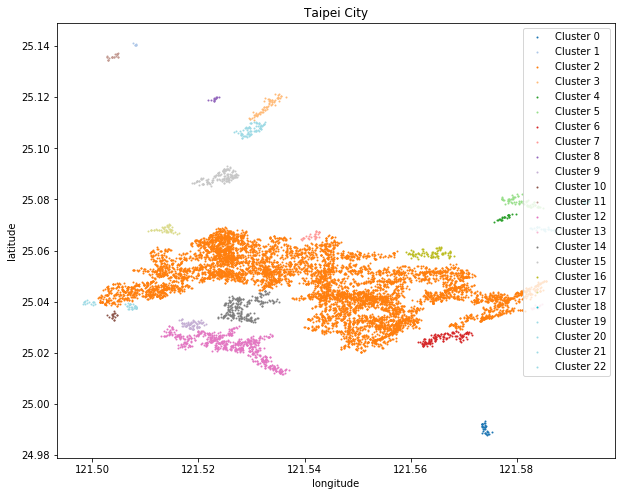

In [550]:
plt.figure(figsize = (10,8))
for i in range(0,23):
    plt.scatter(X.values[y_dbs == i, 0], X.values[y_dbs == i, 1], s = 1, c = cmap(i), label = 'Cluster {}'.format(i))

plt.title('Taipei City')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()


## Geo Location 
- https://github.com/ywchiu/geomining/blob/master/20151016_Tutorial.ipynb